In [1]:
## Program description: Ranjan Family Facial Recognition Project - uses a convolutional neural network ##
## Name of Author: Aditya Ranjan ##
## ----------------------------------------------------------------------------- ##


#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Essential Libraries
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from google.colab import files
import os
import shutil
from tqdm import tqdm
!pip install mtcnn
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [0]:
#Extracting faces from the family image collection and storing them in drive


#List of the number of images in each category
#5 categories - Adi (me), Arya (my sister), Mom, Dad, and trash
ImageNumber = [1, 1, 1, 1, 1]

#Looping through all images in the RanjansPhotos folder
for file in os.listdir("/content/drive/My Drive/RanjansPhotos"):

  #Get the file name of the image
  filename = os.fsdecode(file)

  #Open the image, resize it, and convert it to a numpy array
  image = Image.open("/content/drive/My Drive/RanjansPhotos/" + filename)
  image = image.convert("RGB")
  image = image.resize((400, 400))
  pixels = asarray(image)

  #Create the face detector
  detector = MTCNN()

  #Detect faces in the image
  results = detector.detect_faces(pixels)

  #Loop through the results
  for i in range(len(results)):

    #Extract the bounding box from the face
    x1, y1, width, height = results[i]["box"]

    #Calculating boundary dimensions
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    #Extract the face from the image
    face = pixels[y1 : y2, x1 : x2]

    #Resize the face image
    image = Image.fromarray(face)
    image = image.resize((160, 160))

    #Plot the face image and prompt the user for training labels
    fig = plt.figure()
    plt.imshow(image, cmap = plt.get_cmap("binary"))
    plt.show()
    ImageCategory = input("What folder would you like to add this image to?")
    print("")

    #Save the image and add it to the appropriate folder in google drive
    #Adds the image to the AryaPhotos folder if the user enters 1
    if ImageCategory == "1":
      image.save("arya" + str(ImageNumber[0]) + ".jpg")
      shutil.move("/content/" + "arya" + str(ImageNumber[0]) + ".jpg", "/content/drive/My Drive/AryaPhotos/" + "arya" + str(ImageNumber[0]) + ".jpg")
      ImageNumber[0] += 1
    #Adds the image to the AdiPhotos folder if the user enters 2
    elif ImageCategory == "2":
      image.save("adi" + str(ImageNumber[1]) + ".jpg")
      shutil.move("/content/" + "adi" + str(ImageNumber[1]) + ".jpg", "/content/drive/My Drive/AdiPhotos/" + "adi" + str(ImageNumber[1]) + ".jpg")
      ImageNumber[1] += 1
    #Adds the image to the MomPhotos folder if the user enters 3
    elif ImageCategory == "3":
      image.save("mom" + str(ImageNumber[2]) + ".jpg")
      shutil.move("/content/" + "mom" + str(ImageNumber[2]) + ".jpg", "/content/drive/My Drive/MomPhotos/" + "mom" + str(ImageNumber[2]) + ".jpg")
      ImageNumber[2] += 1
    #Adds the image to the DadPhotos folder if the user enters 4
    elif ImageCategory == "4":
      image.save("dad" + str(ImageNumber[3]) + ".jpg")
      shutil.move("/content/" + "dad" + str(ImageNumber[3]) + ".jpg", "/content/drive/My Drive/DadPhotos/" + "dad" + str(ImageNumber[3]) + ".jpg")
      ImageNumber[3] += 1
    #Adds the image to the TrashPhotos folder if the user enters 5
    elif ImageCategory == "5":
      image.save("trash" + str(ImageNumber[4]) + ".jpg")
      shutil.move("/content/" + "trash" + str(ImageNumber[4]) + ".jpg", "/content/drive/My Drive/TrashPhotos/" + "trash" + str(ImageNumber[4]) + ".jpg")
      ImageNumber[4] += 1


#NOTE: Output is not shown as the cell has already been run a while ago and the images have been added to their respective folders.
#NOTE: 39 of the 214 original images have already been removed from the training set (175 training images) and added to the TestPhotos folder (39 testing images).
#NOTE: Some photos were quite similar, so manually sorting the images ensured that a variety of different testing photos were selected with the right proportion for each family member.

In [3]:
#Training Data Preparation


#Necessary Lists
TrainImg, TrainLabel = [], []

#Loop through all training images - add each image and training label to the training set
#Training set (total of 175 images) - 59 Mom images, 46 Adi images, 39 Arya images, and 31 Dad images
for i in tqdm(range(59)): 
  TrainImg.append(asarray(Image.open("/content/drive/My Drive/FamilyFaceRecPics/MomPhotos/mom" + str(i + 1) + ".jpg")))
  TrainLabel.append(2)
  if i < 46:
    TrainImg.append(asarray(Image.open("/content/drive/My Drive/FamilyFaceRecPics/AdiPhotos/adi" + str(i + 1) + ".jpg")))
    TrainLabel.append(1)
  if i < 39:
    TrainImg.append(asarray(Image.open("/content/drive/My Drive/FamilyFaceRecPics/AryaPhotos/arya" + str(i + 1) + ".jpg")))
    TrainLabel.append(0)
  if i < 31:
    TrainImg.append(asarray(Image.open("/content/drive/My Drive/FamilyFaceRecPics/DadPhotos/dad" + str(i + 1) + ".jpg")))
    TrainLabel.append(3)

#Convert both lists to numpy arrays and normalize the training set
TrainImg, TrainLabel = np.array(TrainImg) / 255, np.array(TrainLabel)

100%|██████████| 59/59 [00:00<00:00, 165.44it/s]


Epoch 1/10
6/6 [==============================] - 5s 776ms/step - loss: 2.7313 - accuracy: 0.2457
Epoch 2/10
6/6 [==============================] - 5s 769ms/step - loss: 1.3581 - accuracy: 0.3657
Epoch 3/10
6/6 [==============================] - 5s 767ms/step - loss: 1.2163 - accuracy: 0.4686
Epoch 4/10
6/6 [==============================] - 5s 769ms/step - loss: 1.0850 - accuracy: 0.5771
Epoch 5/10
6/6 [==============================] - 5s 772ms/step - loss: 0.8331 - accuracy: 0.7257
Epoch 6/10
6/6 [==============================] - 5s 768ms/step - loss: 0.6202 - accuracy: 0.8343
Epoch 7/10
6/6 [==============================] - 5s 766ms/step - loss: 0.4554 - accuracy: 0.8571
Epoch 8/10
6/6 [==============================] - 5s 772ms/step - loss: 0.2768 - accuracy: 0.9029
Epoch 9/10
6/6 [==============================] - 5s 774ms/step - loss: 0.1926 - accuracy: 0.9371
Epoch 10/10
6/6 [==============================] - 5s 776ms/step - loss: 0.1222 - accuracy: 0.9771


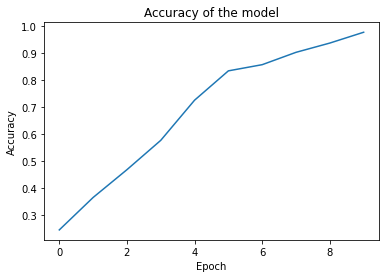

In [23]:
#Build and train a convolutional neural network


#Develop the structure of the model
model = keras.Sequential(
    [layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (160, 160, 3)),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, (3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Dropout(0.25),
     layers.Flatten(),
     layers.Dense(128, activation = "relu"),
     layers.Dropout(0.25),
     layers.Dense(4, activation = "softmax")
])

#Compile the model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

#Train the model
modelHistory = model.fit(TrainImg, TrainLabel, epochs = 10)

#Plot the accuracy of the model
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of the model")
plt.plot(modelHistory.history["accuracy"])
plt.show()

In [5]:
#Testing Data Preparation


#Necessary Lists
TestImg, TestLabels = [], [0, 3, 2, 1, 3, 2, 2, 1, 0, 2, 3, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]

#Loop through all testing images - add each image to the testing set
for i in tqdm(range(39)):
  image = Image.open("/content/drive/My Drive/FamilyFaceRecPics/TestPhotos/TEST" + str(i + 1) + ".jpg")
  TestImg.append(asarray(image))

#Convert the testing set to a numpy array and normalize it
TestImg = np.array(TestImg) / 255

100%|██████████| 39/39 [00:00<00:00, 550.59it/s]


Prediction: Dad
Actual: Arya


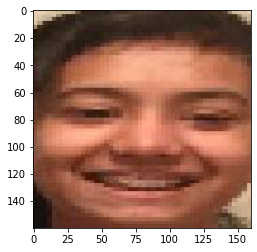


Prediction: Dad
Actual: Dad


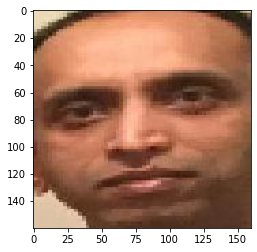


Prediction: Mom
Actual: Mom


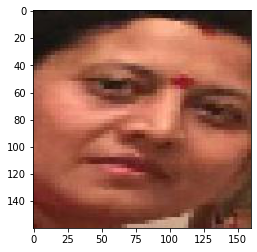


Prediction: Adi
Actual: Adi


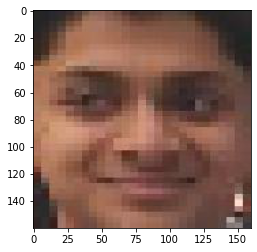


Prediction: Dad
Actual: Dad


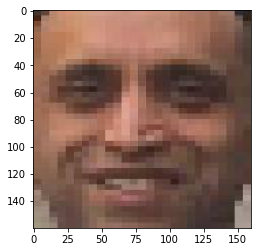


Prediction: Dad
Actual: Mom


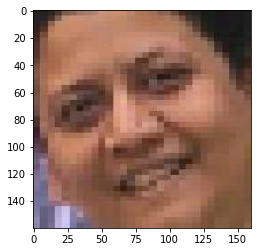


Prediction: Mom
Actual: Mom


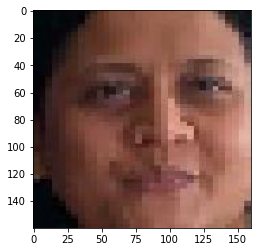


Prediction: Mom
Actual: Adi


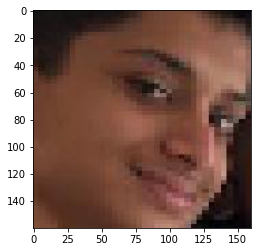


Prediction: Arya
Actual: Arya


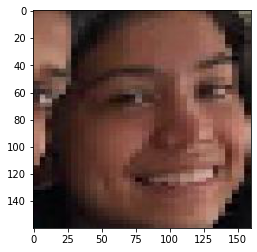


Prediction: Mom
Actual: Mom


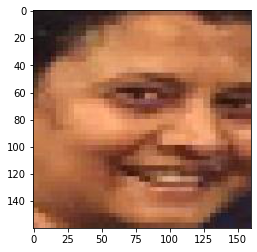


Prediction: Dad
Actual: Dad


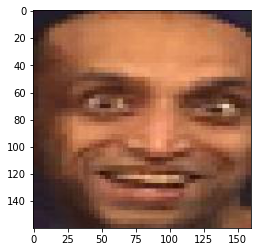


Prediction: Arya
Actual: Arya


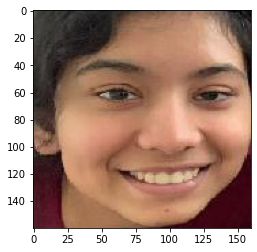


Prediction: Dad
Actual: Dad


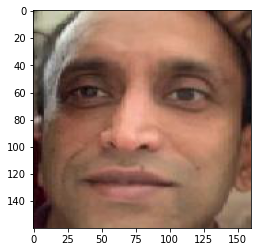


Prediction: Dad
Actual: Mom


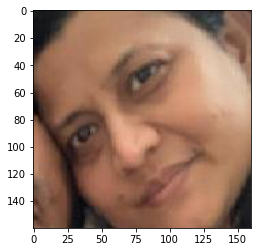


Prediction: Dad
Actual: Adi


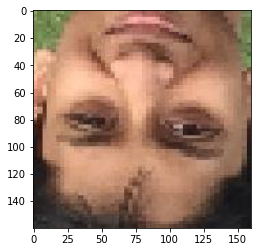


Prediction: Dad
Actual: Adi


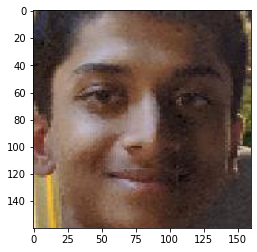


Prediction: Adi
Actual: Adi


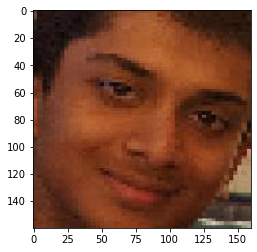


Prediction: Adi
Actual: Adi


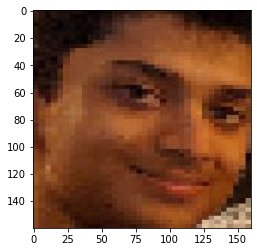


Prediction: Adi
Actual: Adi


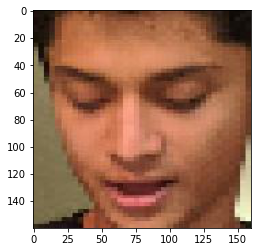


Prediction: Dad
Actual: Adi


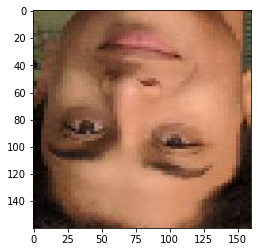


Prediction: Adi
Actual: Adi


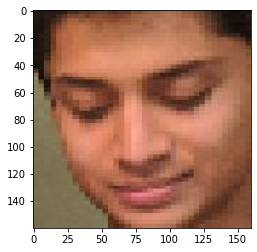


Prediction: Arya
Actual: Arya


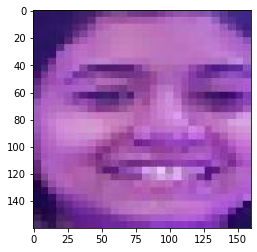


Prediction: Dad
Actual: Arya


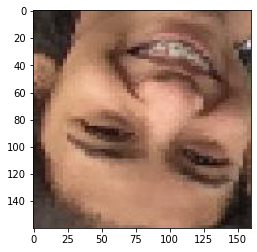


Prediction: Arya
Actual: Arya


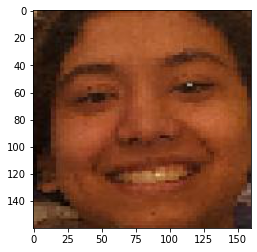


Prediction: Arya
Actual: Arya


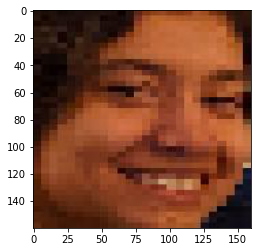


Prediction: Arya
Actual: Arya


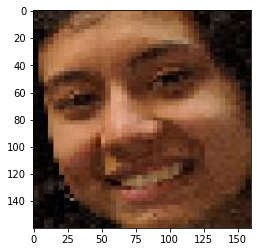


Prediction: Arya
Actual: Arya


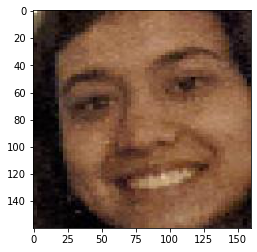


Prediction: Dad
Actual: Dad


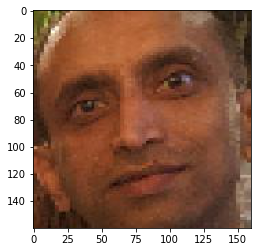


Prediction: Dad
Actual: Dad


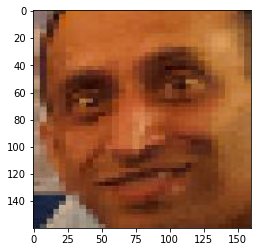


Prediction: Dad
Actual: Dad


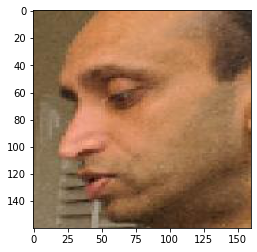


Prediction: Dad
Actual: Dad


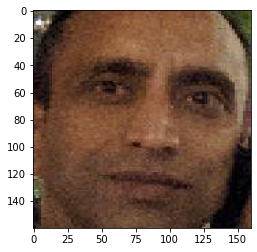


Prediction: Mom
Actual: Mom


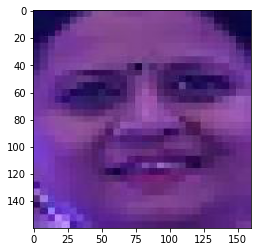


Prediction: Mom
Actual: Mom


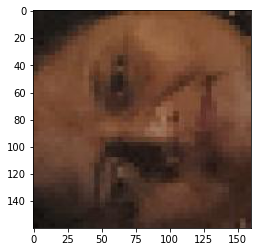


Prediction: Mom
Actual: Mom


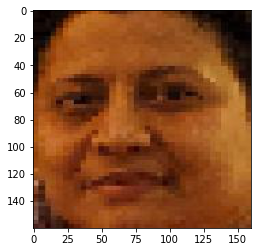


Prediction: Mom
Actual: Mom


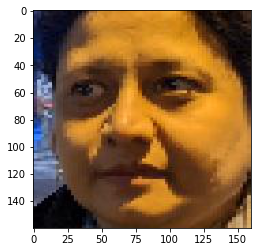


Prediction: Mom
Actual: Mom


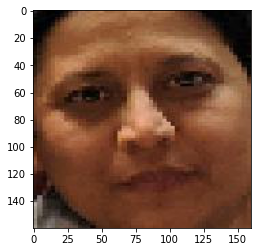


Prediction: Mom
Actual: Mom


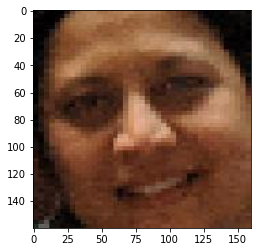


Prediction: Mom
Actual: Mom


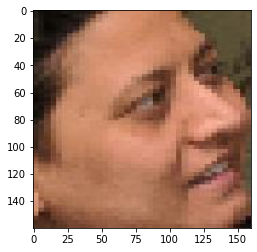


Prediction: Mom
Actual: Mom


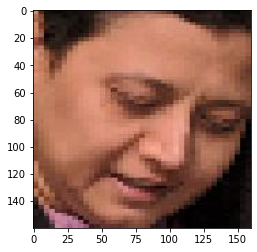


The Trained Model predicted 31 of the 39 testing images correctly.
The Trained Model's accuracy on the testing set is: 79.48717948717949%.


In [24]:
#Make Predictions on the Testing Set


#Neccesary Lists
NameLabel = np.array(["Arya", "Adi", "Mom", "Dad"])

#Make predictions using the trained model
predictions = model.predict(TestImg)

#Loop through all predictions, display each one, and calculate the testing accuracy
accCount = 0
for j in range(39):
  print("Prediction: " + NameLabel[np.argmax(predictions[j])])
  print("Actual: " + NameLabel[TestLabels[j]])
  plt.imshow(TestImg[j], cmap = plt.get_cmap("binary"))
  plt.show()
  if NameLabel[np.argmax(predictions[j])] == NameLabel[TestLabels[j]]:
    accCount += 1
  print("")
print("The Trained Model predicted " + str(accCount) + " of the 39 testing images correctly.")
print("The Trained Model's accuracy on the testing set is: " + str((accCount / 39) * 100) + "%.")

A lot of the incorrectly predicted images in the testing set are either positioned at weird angles or are too grainy.

This is Version 1 of this project and I intend to collect many more pictures in the future and experiment with the structure of the model to develop an enhanced Version 2.

